In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | kapaa
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | blagoveshchensk
Processing Record 4 of Set 13 | port elizabeth
Processing Record 5 of Set 13 | vaini
Processing Record 6 of Set 13 | bredasdorp
Processing Record 7 of Set 13 | alekseyevka
Processing Record 8 of Set 13 | tasiilaq
Processing Record 9 of Set 13 | sinnamary
Processing Record 10 of Set 13 | aljezur
Processing Record 11 of Set 13 | jamestown
Processing Record 12 of Set 13 | ushuaia
Processing Record 13 of Set 13 | inongo
Processing Record 14 of Set 13 | port lincoln
Processing Record 15 of Set 13 | pevek
Processing Record 16 of Set 13 | upernavik
Processing Record 17 of Set 13 | rikitea
Processing Record 18 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 13 | sturgeon bay
Processing Record 20 of Set 13 | ust-tsilma
Processing Record 21 of Set 13 | torbay
Processing Recor

City not found. Skipping...
Processing Record 34 of Set 16 | mosetse
Processing Record 35 of Set 16 | wajima
Processing Record 36 of Set 16 | khasan
Processing Record 37 of Set 16 | sorvag
City not found. Skipping...
Processing Record 38 of Set 16 | boksitogorsk
Processing Record 39 of Set 16 | kodiak
Processing Record 40 of Set 16 | tayga
Processing Record 41 of Set 16 | manavalakurichi
Processing Record 42 of Set 16 | karmana
City not found. Skipping...
Processing Record 43 of Set 16 | miles city
Processing Record 44 of Set 16 | puerto penasco
Processing Record 45 of Set 16 | punto fijo
Processing Record 46 of Set 16 | tarrafal
Processing Record 47 of Set 16 | shellbrook
Processing Record 48 of Set 16 | kuala terengganu
Processing Record 49 of Set 16 | zhigansk
Processing Record 50 of Set 16 | chokurdakh
Processing Record 1 of Set 17 | itoman
Processing Record 2 of Set 17 | tambopata
Processing Record 3 of Set 17 | severo-kurilsk
Processing Record 4 of Set 17 | sorland
Processing Rec

Processing Record 20 of Set 20 | chuy
Processing Record 21 of Set 20 | skagastrond
City not found. Skipping...
Processing Record 22 of Set 20 | luau
Processing Record 23 of Set 20 | esperance
Processing Record 24 of Set 20 | kavaratti
Processing Record 25 of Set 20 | iquique
Processing Record 26 of Set 20 | erzin
Processing Record 27 of Set 20 | sobolevo
Processing Record 28 of Set 20 | tres arroyos
Processing Record 29 of Set 20 | sao joao do piaui
Processing Record 30 of Set 20 | kitui
Processing Record 31 of Set 20 | hualmay
Processing Record 32 of Set 20 | mackay
Processing Record 33 of Set 20 | alta floresta
Processing Record 34 of Set 20 | shinpokh
Processing Record 35 of Set 20 | kieta
Processing Record 36 of Set 20 | wadhwan
City not found. Skipping...
Processing Record 37 of Set 20 | skjervoy
Processing Record 38 of Set 20 | ankazobe
Processing Record 39 of Set 20 | uong bi
Processing Record 40 of Set 20 | thunder bay
Processing Record 41 of Set 20 | makakilo city
Processing R

Processing Record 3 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 24 | khormuj
City not found. Skipping...
Processing Record 5 of Set 24 | san rafael
Processing Record 6 of Set 24 | vakhrushev
Processing Record 7 of Set 24 | kaeo
Processing Record 8 of Set 24 | myaundzha
Processing Record 9 of Set 24 | utiroa
City not found. Skipping...
Processing Record 10 of Set 24 | quetzaltepec
City not found. Skipping...
Processing Record 11 of Set 24 | salinas
Processing Record 12 of Set 24 | kawambwa
Processing Record 13 of Set 24 | council bluffs
Processing Record 14 of Set 24 | khani
Processing Record 15 of Set 24 | bur gabo
City not found. Skipping...
Processing Record 16 of Set 24 | haines junction
Processing Record 17 of Set 24 | sioux city
Processing Record 18 of Set 24 | killybegs
Processing Record 19 of Set 24 | alice springs
Processing Record 20 of Set 24 | lalibela
Processing Record 21 of Set 24 | contamana
Processing Record 22 of Set 24 | burnie
Processing Record 23

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.72,69,20,3.00,US,2021-09-06 19:23:07
1,Punta Arenas,-53.1500,-70.9167,53.71,62,90,11.50,CL,2021-09-06 19:22:10
2,Blagoveshchensk,50.2667,127.5333,61.41,100,40,0.00,RU,2021-09-06 19:23:08
3,Port Elizabeth,-33.9180,25.5701,55.09,94,75,6.91,ZA,2021-09-06 19:21:45
4,Vaini,-21.2000,-175.2000,64.56,94,20,1.14,TO,2021-09-06 19:23:09
5,Bredasdorp,-34.5322,20.0403,45.72,87,1,2.30,ZA,2021-09-06 19:23:09
6,Alekseyevka,50.6309,38.6903,48.15,51,97,3.36,RU,2021-09-06 19:23:10
7,Tasiilaq,65.6145,-37.6368,42.96,90,95,4.27,GL,2021-09-06 19:23:10
8,Sinnamary,5.3833,-52.9500,82.44,76,100,9.15,GF,2021-09-06 19:19:55
9,Aljezur,37.3191,-8.8033,71.56,78,99,7.45,PT,2021-09-06 19:23:11


In [7]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-09-06 19:23:07,22.0752,-159.3190,82.72,69,20,3.00
1,Punta Arenas,CL,2021-09-06 19:22:10,-53.1500,-70.9167,53.71,62,90,11.50
2,Blagoveshchensk,RU,2021-09-06 19:23:08,50.2667,127.5333,61.41,100,40,0.00
3,Port Elizabeth,ZA,2021-09-06 19:21:45,-33.9180,25.5701,55.09,94,75,6.91
4,Vaini,TO,2021-09-06 19:23:09,-21.2000,-175.2000,64.56,94,20,1.14
5,Bredasdorp,ZA,2021-09-06 19:23:09,-34.5322,20.0403,45.72,87,1,2.30
6,Alekseyevka,RU,2021-09-06 19:23:10,50.6309,38.6903,48.15,51,97,3.36
7,Tasiilaq,GL,2021-09-06 19:23:10,65.6145,-37.6368,42.96,90,95,4.27
8,Sinnamary,GF,2021-09-06 19:19:55,5.3833,-52.9500,82.44,76,100,9.15
9,Aljezur,PT,2021-09-06 19:23:11,37.3191,-8.8033,71.56,78,99,7.45


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

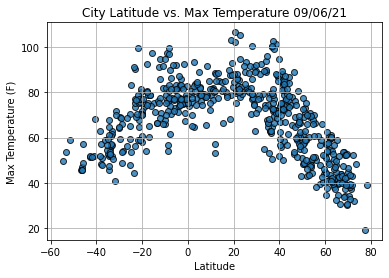

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

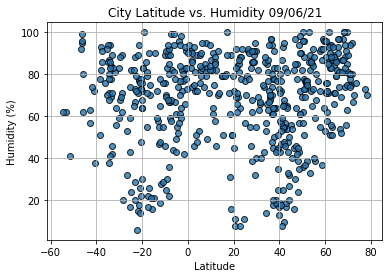

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

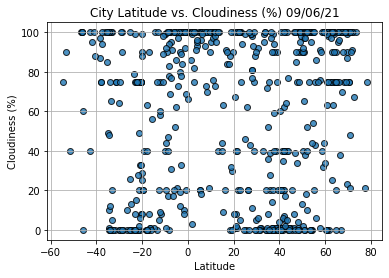

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

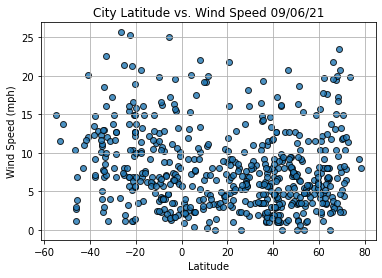

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-09-06 19:23:07,22.0752,-159.3190,82.72,69,20,3.00
2,Blagoveshchensk,RU,2021-09-06 19:23:08,50.2667,127.5333,61.41,100,40,0.00
6,Alekseyevka,RU,2021-09-06 19:23:10,50.6309,38.6903,48.15,51,97,3.36
7,Tasiilaq,GL,2021-09-06 19:23:10,65.6145,-37.6368,42.96,90,95,4.27
8,Sinnamary,GF,2021-09-06 19:19:55,5.3833,-52.9500,82.44,76,100,9.15


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

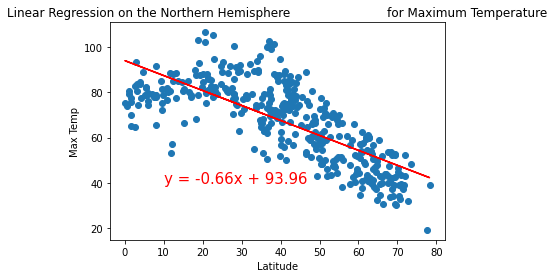

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

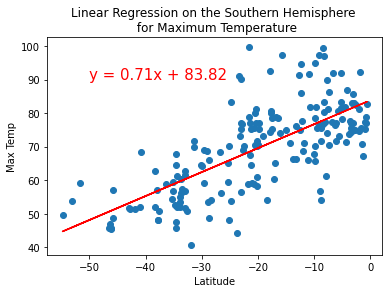

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

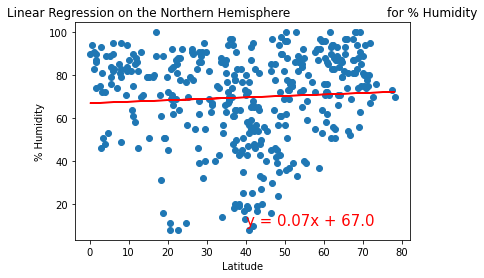

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

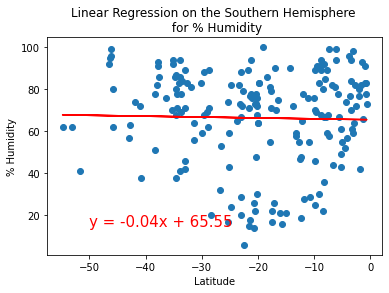

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

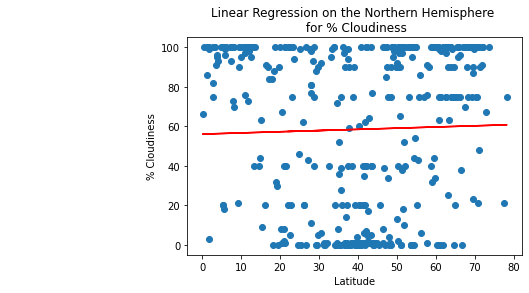

In [24]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

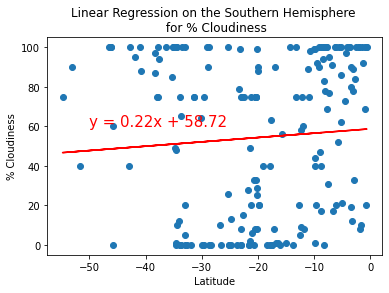

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

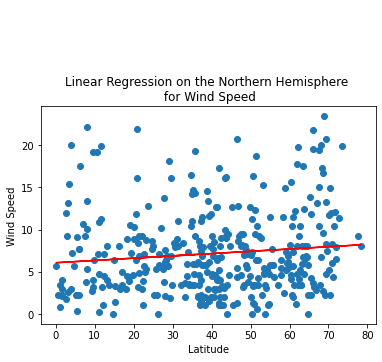

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

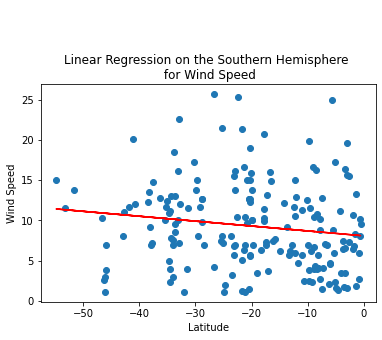

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))